# Data Loading

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Algorithms
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')
sns.set(style = "whitegrid")

In [2]:
# Load the dataset
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Data dictionary for dataset

Below is the data dictionary for the dataset

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [3]:
# Info about the dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# shape of dataset
bikes.shape

(730, 16)

In [5]:
# Basic statistics 
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Missing values - no missing data found :)
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Dataset Preparation

### 1. Dropping unnecessory columns

##### Dropping instant feature

The unique values in the instant independant variable are same as the number of observation we have. 
Also as per the data dictionary, it is just a index. 
So we can drop **instant** variable

In [7]:
# Unique values in the instant feature
bikes.instant.nunique()

730

In [8]:
bikes.drop('instant', axis=1, inplace=True)

##### Dropping casual and registered 

As per the data dictionary independant variable casual and registered are:

- casual : count of casual users
- registered : count of registered users

As our target dependant variable is **cnt**, we are not concerned about the **casual** and **registered** variables. We are good to drop them.

In [9]:
bikes.drop('casual', axis=1, inplace=True)
bikes.drop('registered', axis=1, inplace=True)

##### Dropping dteday

We have saveral other independant variables which are derived from the **dteday**. Below variables are derived from dteday variable

season, yr, mnth, holiday, weekday, workingday

Hence we are good to drop the **dteday** variable. 


In [10]:
bikes.drop('dteday', axis=1, inplace=True)

### 2. Handling Categorical Variables


In [11]:
print("Unique values in season variable :", bikes.season.nunique())
print("Unique values in yr variable :", bikes.yr.nunique())
print("Unique values in mnth variable :", bikes.mnth.nunique())
print("Unique values in holiday variable :", bikes.holiday.nunique())
print("Unique values in weekday variable :", bikes.weekday.nunique())
print("Unique values in workingday variable :", bikes.workingday.nunique())
print("Unique values in weathersit variable :", bikes.weathersit.nunique())

Unique values in season variable : 4
Unique values in yr variable : 2
Unique values in mnth variable : 12
Unique values in holiday variable : 2
Unique values in weekday variable : 7
Unique values in workingday variable : 2
Unique values in weathersit variable : 3


Variables **yr**, **holiday**, **workingday** are the binary numeric and we do not need to convert them again back to categorical to numeric using LabelEncoding.

Variables **season**, **mnth**, **weekday**, and **weathersit** are the categorical variables. So we need to convert them back to categorical. Once we converted them we need to create the dummy variable out of it. 

##### Categorical variable - season

As per the data dictionary, 

- 1 : spring, 
- 2 : summer, 
- 3 : fall, 
- 4 : winter

Lets convert the numbers to categories. 

In [12]:
bikes['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [13]:
bikes['season'] = bikes.season.map({ 1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [14]:
bikes['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

##### Categorical variable - mnth

Lets convert the numbers to categories for mnth variable

In [15]:
bikes['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [16]:
num_to_month = {1: 'jan', 
                2: 'feb', 
                3: 'mar', 
                4: 'apr', 
                5: 'may', 
                6: 'jun', 
                7: 'jul', 
                8: 'aug', 
                9: 'sep', 
                10: 'oct', 
                11: 'nov', 
                12: 'dec'
               }
bikes['mnth'] = bikes['mnth'].map(num_to_month)

In [17]:
bikes['mnth'].value_counts()

oct    62
jan    62
mar    62
may    62
jul    62
aug    62
dec    62
sep    60
nov    60
apr    60
jun    60
feb    56
Name: mnth, dtype: int64

##### Categorical variable - weekday

According to the dteday variable and first observation value which is **01-01-2018**. Accoring to the calendar it was a **Monday**. 

Hence we need to convert the numeric values as per the below dictionary:

{
6: 'mon', 
0: 'tue',
1: 'wed',
2: 'thu',
3: 'fri',
4: 'sat',
5: 'sun'
}

In [18]:
bikes['weekday'].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [19]:
num_to_days = { 6: 'mon', 0: 'tue', 1: 'wed', 2: 'thu', 3: 'fri', 4: 'sat', 5: 'sun' }

bikes['weekday'] = bikes['weekday'].map(num_to_days)

In [20]:
bikes['weekday'].value_counts()

wed    105
tue    105
mon    105
thu    104
sun    104
sat    104
fri    103
Name: weekday, dtype: int64

##### Categorical variable - weathersit

As per the data dictionary

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [21]:
bikes['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [22]:
bikes['weathersit'] = bikes['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_snow', 4: 'heavy_snow'})

In [23]:
bikes['weathersit'].value_counts()

clear         463
mist          246
light_snow     21
Name: weathersit, dtype: int64

In [24]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


# Exploratpry Data Analysis

### 1. Visualising Numeric Variables


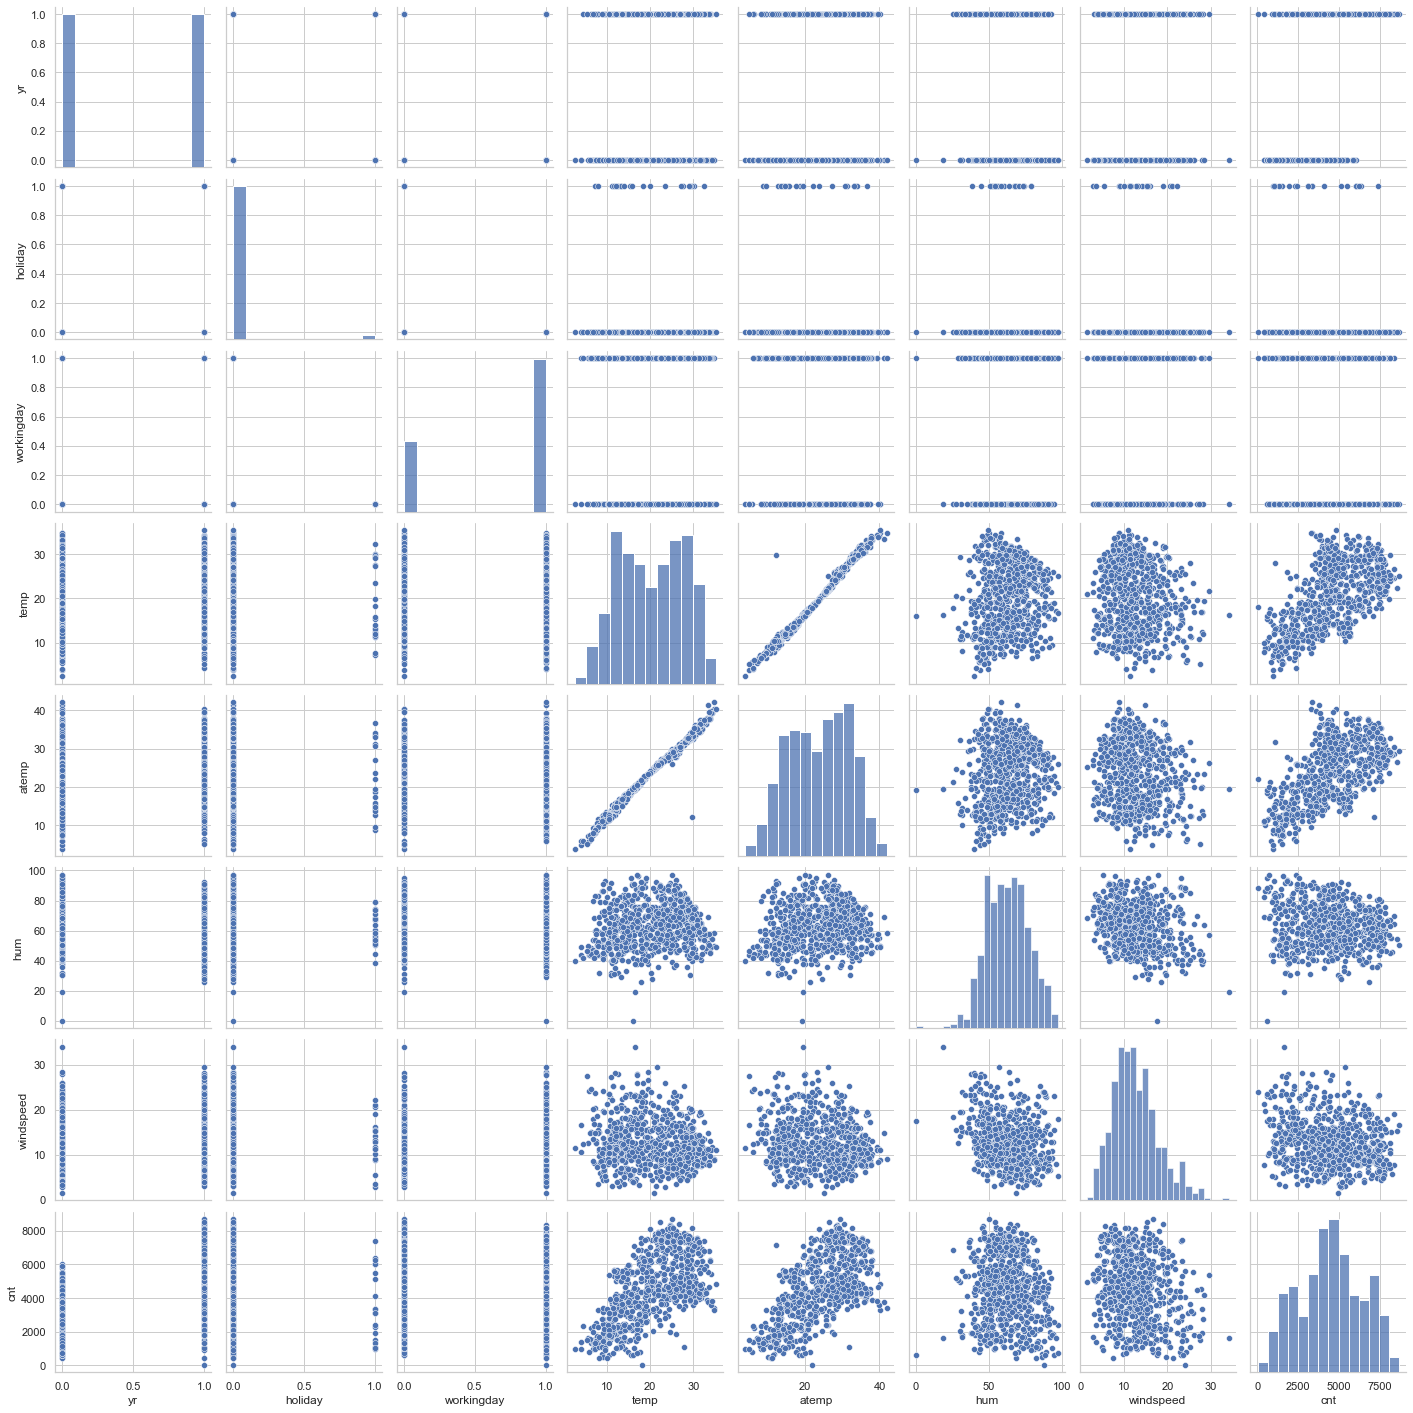

In [25]:
sns.pairplot(bikes)
plt.show()

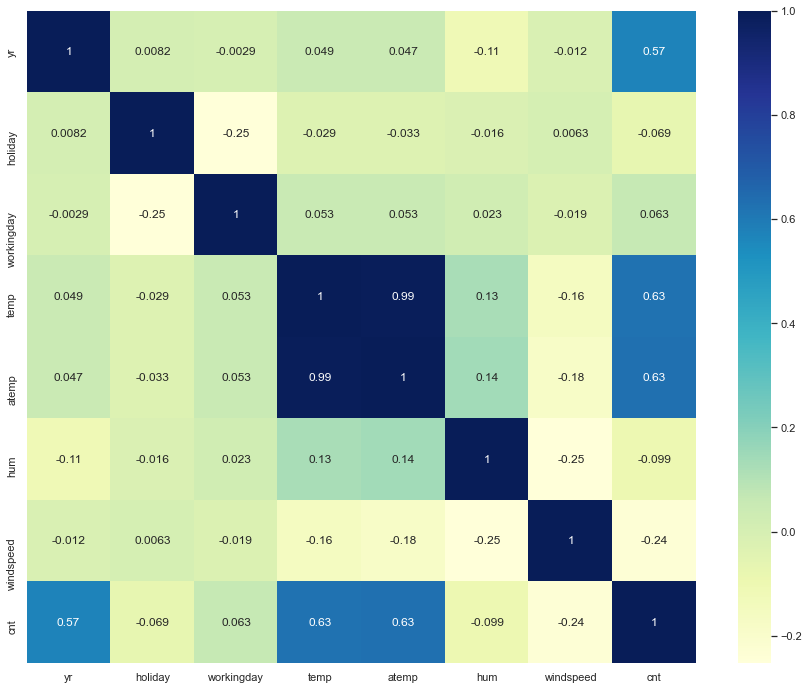

In [26]:
plt.figure(figsize=(15, 12))
sns.heatmap(bikes.corr(), cmap="YlGnBu", annot = True)
plt.show()

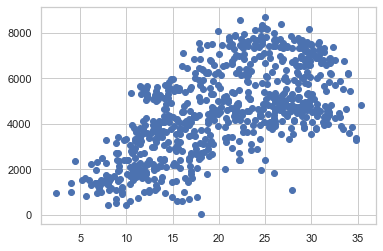

In [27]:
plt.scatter(x='temp', y='cnt', data=bikes)

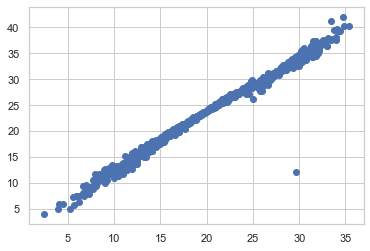

In [28]:
plt.scatter(x='temp', y='atemp', data=bikes)

We can see that cnt has correlation with yr, temp, and atemp

Also we can see that there is a high colinearity between temp and atemp 

**Assumption 1 of Linear Regression** - We have a linear relationship between cnt and temp

So lets drop the `atemp` variable from our dataset

In [29]:
bikes.drop('atemp', axis=1, inplace=True)

### 2. Visualising Categorical Variables

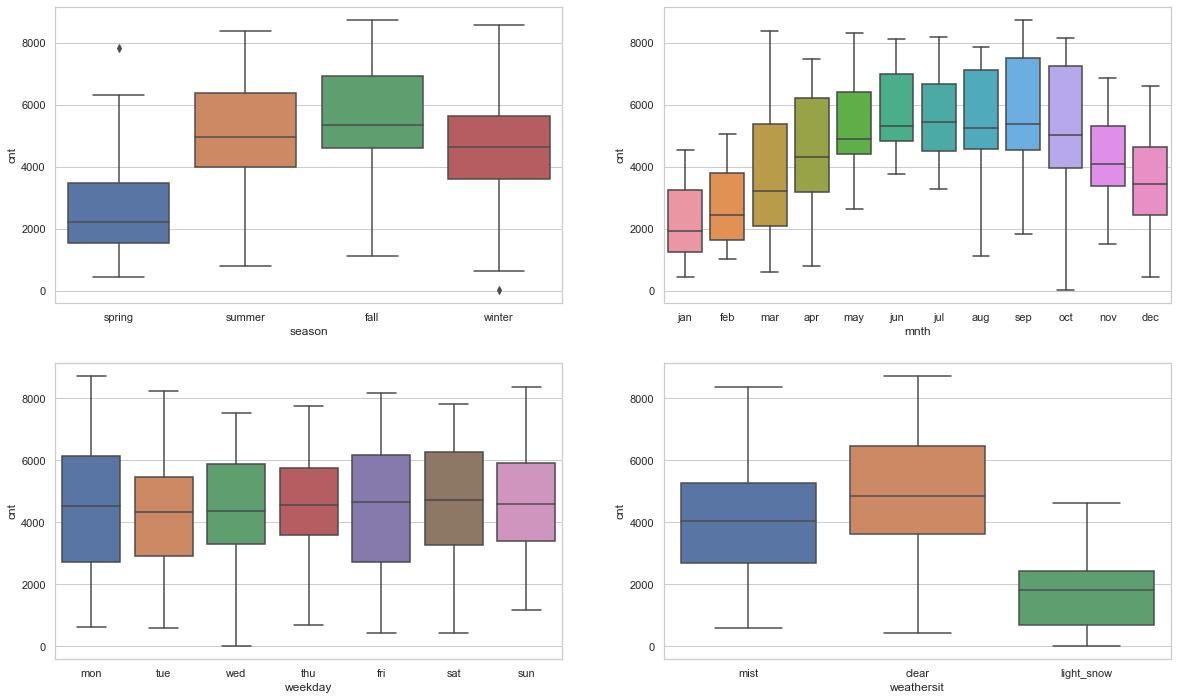

In [30]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

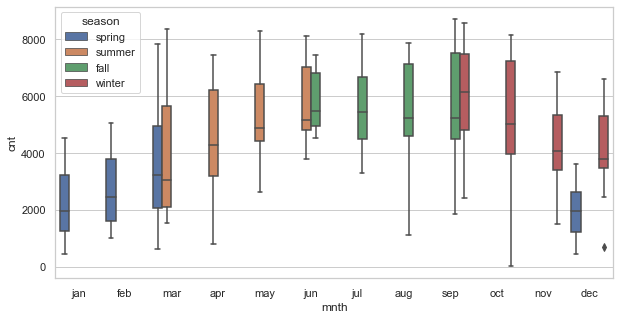

In [31]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'season', data = bikes)
plt.show()

We can see that summer and fall recorded the more bike rentals

# Data Transformation

### 1. Splitting data into train and test


In [32]:
# Devide the data into X (predictor variables) and y (target)
y = bikes.pop('cnt')
X = bikes

In [33]:
#trainingSet, testSet = train_test_split(bikes, test_size=0.1, random_state=42)

In [34]:
# Devide the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [35]:
# Check the shape of train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(657, 10)
(73, 10)
(657,)
(73,)


### 2. Creating Dummy Variables - X_train

As we have now the proper categorical variables, we need to create the dummy variables out of it

In [36]:
# Class Myencoder to create a dummy variables

class MyEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self, drop='first', sparse=False):
        self.encoder = OneHotEncoder(drop=drop, sparse=sparse)
        self.categorical_columns = []
        self.columns = []
        
    def fit(self, X_train, categorical_columns):
        data = X_train.copy()
        self.categorical_columns = categorical_columns
        data_to_encode = data[self.categorical_columns]
        self.columns = pd.get_dummies(data_to_encode, drop_first=True, dtype=('int')).columns
        self.encoder.fit(data_to_encode)
        return self.encoder
    
    def transform(self, X_test):
        data = X_test.copy()
        data.reset_index(drop=True, inplace=True)
        data_to_encode = data[self.categorical_columns]
        data_left = data.drop(self.categorical_columns, axis=1)
        data_encoded = pd.DataFrame(self.encoder.transform(data_to_encode), columns=self.columns)
        data_encoded = data_encoded.astype('int64')
        return pd.concat([data_left, data_encoded], axis=1)

In [37]:
# Create a boolean mask for categorical columns and get list of categorical column names
categorical_mask = (bikes.dtypes == object)
categorical_columns = bikes.columns[categorical_mask].tolist()
categorical_columns

['season', 'mnth', 'weekday', 'weathersit']

In [38]:
# Apply encoding to the categorical columns for X_train
encoder = MyEncoder()
encoder.fit(X_train, categorical_columns)
X_train = encoder.transform(X_train)

In [39]:
# apply encoding to the categorical columns for X_test
encoder.transform(X_test)
X_test = encoder.transform(X_test)

In [40]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_mist
0,0,0,1,13.769153,83.6250,15.208464,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,1,30.408347,69.4167,9.291761,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,13.085847,50.8750,9.458993,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,1,3.993043,49.1739,10.608110,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,29.041653,41.5000,8.416607,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [41]:
# check shape of the train data
X_train.shape

(657, 28)

In [42]:
# check the datatypes of train data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     657 non-null    int64  
 1   holiday                657 non-null    int64  
 2   workingday             657 non-null    int64  
 3   temp                   657 non-null    float64
 4   hum                    657 non-null    float64
 5   windspeed              657 non-null    float64
 6   season_spring          657 non-null    int64  
 7   season_summer          657 non-null    int64  
 8   season_winter          657 non-null    int64  
 9   mnth_aug               657 non-null    int64  
 10  mnth_dec               657 non-null    int64  
 11  mnth_feb               657 non-null    int64  
 12  mnth_jan               657 non-null    int64  
 13  mnth_jul               657 non-null    int64  
 14  mnth_jun               657 non-null    int64  
 15  mnth_m

In [43]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_mist
0,1,0,0,20.295000,50.2917,12.791439,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,27.367500,81.8750,14.333846,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,13.085847,62.3750,11.833339,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,17.356653,75.7500,3.167425,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0,1,27.880000,49.2917,13.083693,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
X_test.shape

(73, 28)

### 3. Scalling data

We need to scale the below variables. 

- temp
- hum
- windspeed

We tried fitting the model with `MinMaxScaler`, which gave the some sort of overfitted model. 

Hence we decided to try `StandardScaler`

In [45]:
# scaling X_train

#scaler_X = MinMaxScaler()
#vars_to_scale = ['temp', 'hum', 'windspeed']
#X_train[vars_to_scale] = scaler_X.fit_transform(X_train[vars_to_scale])

#from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
vars_to_scale = ['temp', 'hum', 'windspeed']
X_train[vars_to_scale] = scaler_X.fit_transform(X_train[vars_to_scale])

In [46]:
# scaling y_train

#scaler_y = MinMaxScaler()
#y_train = y_train.values.reshape(-1, 1)
#y_train = scaler_y.fit_transform(y_train)

scaler_y = StandardScaler()
y_train = y_train.values.reshape(-1, 1)
y_train = scaler_y.fit_transform(y_train)

In [47]:
# scaling X_test
X_test[vars_to_scale] = scaler_X.transform(X_test[vars_to_scale])

In [48]:
# scaling y_test
y_test = y_test.values.reshape(-1, 1)
y_test = scaler_y.transform(y_test)

# Model Building

### 1. Generic Code

In [49]:
# Below code is to fit the OLS model, Get the VIF score and predictions

class ModelOLS:
    
    def __init__(self):
        pass
        
    def myOLS(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        X_train_sm = sm.add_constant(self.X_train)
        self.lr = sm.OLS(self.y_train, X_train_sm).fit()
        return self.lr
    
    def myVIF(self, X_train):
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by='VIF', ascending=False)
        return vif
    
    def predict(self, X_train):
        self.X_train = X_train
        X_train_sm = sm.add_constant(self.X_train)
        pred = self.lr.predict(X_train_sm)
        return pred


### 2. Feature selection using RFE

We will try the automated + manual backword elimination of features. 

First we will try to get the maximum 20 features through RFE and then gradually we will try to eliminate the features which are not significant. 

* We will check the p-value significance - If p-value is is more than 0.05 then we will consider the feature to drop from dataset
* and VIF score - If VIF score is more than 5 then we will remove the feature

In [50]:
# Fitting linear regression 

lm = LinearRegression()
lm.fit(X_train, y_train)

# RFE for top 20 Features
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [51]:
rfe.support_, rfe.ranking_

(array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        False,  True, False,  True,  True, False,  True,  True,  True,
         True,  True,  True, False, False, False,  True, False,  True,
         True]),
 array([1, 1, 1, 1, 1, 1, 1, 6, 1, 4, 1, 3, 1, 1, 8, 1, 1, 1, 1, 1, 1, 7,
        9, 5, 1, 2, 1, 1]))

In [52]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 8),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_sep', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 7),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 5),
 ('weekday_tue', True, 1),
 ('weekday_wed', False, 2),
 ('weathersit_light_snow', True, 1),
 ('weathersit_mist', True, 1)]

In [53]:
# list of the columns RFE supports

cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_tue', 'weathersit_light_snow',
       'weathersit_mist'],
      dtype='object')

In [54]:
# list of the columns RFE rejected
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jun', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_wed'],
      dtype='object')

### 3. Model Building

#### Model1

We will build the first model based on the feature we got through RFE.

Through RFE we got the below features:

'yr', 
'holiday', 
'workingday', 
'temp', 
'hum', 
'windspeed',
'season_spring', 
'season_winter', 
'mnth_dec', 
'mnth_jan', 
'mnth_jul',
'mnth_mar', 
'mnth_may', 
'mnth_nov', 
'mnth_oct', 
'mnth_sep',
'weekday_mon', 
'weekday_tue', 
'weathersit_light_snow',
'weathersit_mist'

In [55]:
X_train_ols = X_train[cols]

model1 = ModelOLS()
model1.myOLS(X_train_ols, y_train).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     186.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.39e-245
Time:                        13:30:00   Log-Likelihood:                -314.77
No. Observations:                 657   AIC:                             669.5
Df Residuals:                     637   BIC:                             759.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3560      0.037     -9.501      0.000      -0.430      -0.282
yr                        1.0313      0.032     32.719      0.000       0.969       1.093
holiday                  -0.3042      0.074     -4.138      0.000      -0.449      -0.160
workingday                0.0300      0.028      1.091      0.276      -0.024       0.084
temp                      0.4250      0.030     14.283      0.000       0.367       0.483
hum                      -0.1121      0.022     -5.133      0.000      -0.155      -0.069
windspeed                -0.1074      0.017     -6.369      0.000      -0.140      -0.074
season_spring            -0.5708      0.064     -8.854      0.000      -0.697      -0.444
season_winter             0.3041      0.091      3.335      0.001       0.125       0.483
mnth_dec                 -0.1833      0.089     -2.051      0.041      -0.359      -0.008
mnth_jan                 -0.0808      0.074     -1.087      0.277      -0.227       0.065
mnth_jul                 -0.2190      0.065     -3.346      0.001      -0.348      -0.090
mnth_mar                  0.1818      0.067      2.718      0.007       0.050       0.313
mnth_may                  0.1683      0.061      2.753      0.006       0.048       0.288
mnth_nov                 -0.2296      0.107     -2.137      0.033      -0.441      -0.019
mnth_oct                  0.1262      0.105      1.200      0.231      -0.080       0.333
mnth_sep                  0.2812      0.066      4.278      0.000       0.152       0.410
weekday_mon               0.0776      0.040      1.964      0.050    2.86e-05       0.155
weekday_tue              -0.1594      0.039     -4.108      0.000      -0.236      -0.083
weathersit_light_snow    -1.0504      0.104    -10.089      0.000      -1.255      -0.846
weathersit_mist          -0.2301      0.041     -5.583      0.000      -0.311      -0.149
==============================================================================
Omnibus:                      114.837   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.961
Skew:                          -0.856   Prob(JB):                     1.36e-72
Kurtosis:                       6.026   Cond. No.                     6.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.41e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
model1.myVIF(X_train_ols)

,Features,VIF
7,season_winter,6.42
2,workingday,5.25
14,mnth_oct,3.71
13,mnth_nov,3.70
3,temp,3.69
6,season_spring,3.17
8,mnth_dec,2.43
4,hum,1.99
9,mnth_jan,1.88
17,weekday_tue,1.80


 - Looking at the model1 statistics, **mnth_jan** has a high p-value
 - The VIF score for **mnth_jan** looks good.

As p-value is high lets drop **mnth_jan** and build a new model with the remaining variables

#### Model2

In [57]:
X_train_ols = X_train_ols.drop('mnth_jan', axis=1)
model2 = ModelOLS()
model2.myOLS(X_train_ols, y_train).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.55e-246
Time:                        13:30:00   Log-Likelihood:                -315.38
No. Observations:                 657   AIC:                             668.8
Df Residuals:                     638   BIC:                             754.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3633      0.037     -9.853      0.000      -0.436      -0.291
yr                        1.0306      0.032     32.699      0.000       0.969       1.092
holiday                  -0.3075      0.073     -4.186      0.000      -0.452      -0.163
workingday                0.0285      0.027      1.037      0.300      -0.025       0.082
temp                      0.4344      0.028     15.259      0.000       0.379       0.490
hum                      -0.1133      0.022     -5.192      0.000      -0.156      -0.070
windspeed                -0.1067      0.017     -6.330      0.000      -0.140      -0.074
season_spring            -0.5907      0.062     -9.551      0.000      -0.712      -0.469
season_winter             0.2932      0.091      3.234      0.001       0.115       0.471
mnth_dec                 -0.1512      0.084     -1.792      0.074      -0.317       0.014
mnth_jul                 -0.2232      0.065     -3.414      0.001      -0.352      -0.095
mnth_mar                  0.2074      0.063      3.311      0.001       0.084       0.330
mnth_may                  0.1729      0.061      2.834      0.005       0.053       0.293
mnth_nov                 -0.2031      0.105     -1.941      0.053      -0.409       0.002
mnth_oct                  0.1468      0.103      1.420      0.156      -0.056       0.350
mnth_sep                  0.2874      0.066      4.387      0.000       0.159       0.416
weekday_mon               0.0761      0.039      1.927      0.054      -0.001       0.154
weekday_tue              -0.1604      0.039     -4.134      0.000      -0.237      -0.084
weathersit_light_snow    -1.0478      0.104    -10.066      0.000      -1.252      -0.843
weathersit_mist          -0.2293      0.041     -5.565      0.000      -0.310      -0.148
==============================================================================
Omnibus:                      114.232   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.381
Skew:                          -0.857   Prob(JB):                     3.64e-71
Kurtosis:                       5.986   Cond. No.                     6.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.4e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
model2.myVIF(X_train_ols)

,Features,VIF
7,season_winter,6.34
2,workingday,5.06
13,mnth_oct,3.59
12,mnth_nov,3.51
3,temp,3.38
6,season_spring,2.91
8,mnth_dec,2.16
4,hum,1.99
16,weekday_tue,1.77
15,weekday_mon,1.74


 - Looking at the model2 statistics, **workingday** has a high p-value
 - The VIF score for **workingday** is high.

As p-value and VIF score is high lets drop **workingday** and build a new model with the remaining variables

#### Model3

In [59]:
X_train_ols = X_train_ols.drop('workingday', axis=1)
model3 = ModelOLS()
model3.myOLS(X_train_ols, y_train).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.55e-246
Time:                        13:30:00   Log-Likelihood:                -315.38
No. Observations:                 657   AIC:                             668.8
Df Residuals:                     638   BIC:                             754.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3348      0.042     -7.972      0.000      -0.417      -0.252
yr                        1.0306      0.032     32.699      0.000       0.969       1.092
holiday                  -0.3359      0.092     -3.660      0.000      -0.516      -0.156
temp                      0.4344      0.028     15.259      0.000       0.379       0.490
hum                      -0.1133      0.022     -5.192      0.000      -0.156      -0.070
windspeed                -0.1067      0.017     -6.330      0.000      -0.140      -0.074
season_spring            -0.5907      0.062     -9.551      0.000      -0.712      -0.469
season_winter             0.2932      0.091      3.234      0.001       0.115       0.471
mnth_dec                 -0.1512      0.084     -1.792      0.074      -0.317       0.014
mnth_jul                 -0.2232      0.065     -3.414      0.001      -0.352      -0.095
mnth_mar                  0.2074      0.063      3.311      0.001       0.084       0.330
mnth_may                  0.1729      0.061      2.834      0.005       0.053       0.293
mnth_nov                 -0.2031      0.105     -1.941      0.053      -0.409       0.002
mnth_oct                  0.1468      0.103      1.420      0.156      -0.056       0.350
mnth_sep                  0.2874      0.066      4.387      0.000       0.159       0.416
weekday_mon               0.0476      0.046      1.034      0.301      -0.043       0.138
weekday_tue              -0.1889      0.045     -4.186      0.000      -0.278      -0.100
weathersit_light_snow    -1.0478      0.104    -10.066      0.000      -1.252      -0.843
weathersit_mist          -0.2293      0.041     -5.565      0.000      -0.310      -0.148
==============================================================================
Omnibus:                      114.232   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.381
Skew:                          -0.857   Prob(JB):                     3.64e-71
Kurtosis:                       5.986   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
model3.myVIF(X_train_ols)

,Features,VIF
6,season_winter,8.01
12,mnth_oct,3.91
11,mnth_nov,3.72
2,temp,2.80
5,season_spring,2.63
7,mnth_dec,2.30
17,weathersit_mist,2.01
0,yr,1.93
3,hum,1.81
8,mnth_jul,1.49


 - Looking at the model2 statistics, **weekday_mon** has a high p-value
 - The VIF score for **weekday_mon** looks good.

As p-value is high lets drop **weekday_mon** and build a new model with the remaining variables

#### Model4

In [61]:
X_train_ols = X_train_ols.drop('weekday_mon', axis=1)
model4 = ModelOLS()
model4.myOLS(X_train_ols, y_train).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     207.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.46e-247
Time:                        13:30:00   Log-Likelihood:                -315.93
No. Observations:                 657   AIC:                             667.9
Df Residuals:                     639   BIC:                             748.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3253      0.041     -7.938      0.000      -0.406      -0.245
yr                        1.0308      0.032     32.705      0.000       0.969       1.093
holiday                  -0.3446      0.091     -3.770      0.000      -0.524      -0.165
temp                      0.4324      0.028     15.223      0.000       0.377       0.488
hum                      -0.1133      0.022     -5.193      0.000      -0.156      -0.070
windspeed                -0.1068      0.017     -6.340      0.000      -0.140      -0.074
season_spring            -0.5935      0.062     -9.606      0.000      -0.715      -0.472
season_winter             0.2876      0.090      3.178      0.002       0.110       0.465
mnth_dec                 -0.1486      0.084     -1.762      0.079      -0.314       0.017
mnth_jul                 -0.2216      0.065     -3.391      0.001      -0.350      -0.093
mnth_mar                  0.2049      0.063      3.273      0.001       0.082       0.328
mnth_may                  0.1719      0.061      2.818      0.005       0.052       0.292
mnth_nov                 -0.1997      0.105     -1.909      0.057      -0.405       0.006
mnth_oct                  0.1519      0.103      1.471      0.142      -0.051       0.355
mnth_sep                  0.2877      0.066      4.391      0.000       0.159       0.416
weekday_tue              -0.1970      0.044     -4.433      0.000      -0.284      -0.110
weathersit_light_snow    -1.0468      0.104    -10.056      0.000      -1.251      -0.842
weathersit_mist          -0.2308      0.041     -5.603      0.000      -0.312      -0.150
==============================================================================
Omnibus:                      110.879   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.398
Skew:                          -0.825   Prob(JB):                     1.62e-70
Kurtosis:                       6.003   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model4.myVIF(X_train_ols)

,Features,VIF
6,season_winter,8.01
12,mnth_oct,3.89
11,mnth_nov,3.71
2,temp,2.80
5,season_spring,2.61
7,mnth_dec,2.29
16,weathersit_mist,2.00
0,yr,1.91
3,hum,1.80
8,mnth_jul,1.49


 - Looking at the model2 statistics, **mnth_oct** has a high p-value
 - The VIF score for **mnth_oct** looks good.

As p-value is high lets drop **mnth_oct** and build a new model with the remaining variables

#### Model5

In [63]:
X_train_ols = X_train_ols.drop('mnth_oct', axis=1)
model5 = ModelOLS()
model5.myOLS(X_train_ols, y_train).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     220.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.25e-247
Time:                        13:30:00   Log-Likelihood:                -317.04
No. Observations:                 657   AIC:                             668.1
Df Residuals:                     640   BIC:                             744.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3195      0.041     -7.825      0.000      -0.400      -0.239
yr                        1.0317      0.032     32.712      0.000       0.970       1.094
holiday                  -0.3338      0.091     -3.660      0.000      -0.513      -0.155
temp                      0.4341      0.028     15.282      0.000       0.378       0.490
hum                      -0.1111      0.022     -5.101      0.000      -0.154      -0.068
windspeed                -0.1061      0.017     -6.292      0.000      -0.139      -0.073
season_spring            -0.5873      0.062     -9.519      0.000      -0.708      -0.466
season_winter             0.3931      0.055      7.109      0.000       0.284       0.502
mnth_dec                 -0.2254      0.066     -3.403      0.001      -0.356      -0.095
mnth_jul                 -0.2299      0.065     -3.528      0.000      -0.358      -0.102
mnth_mar                  0.1960      0.062      3.143      0.002       0.074       0.318
mnth_may                  0.1642      0.061      2.699      0.007       0.045       0.284
mnth_nov                 -0.3109      0.072     -4.292      0.000      -0.453      -0.169
mnth_sep                  0.2518      0.061      4.138      0.000       0.132       0.371
weekday_tue              -0.1978      0.044     -4.446      0.000      -0.285      -0.110
weathersit_light_snow    -1.0375      0.104     -9.976      0.000      -1.242      -0.833
weathersit_mist          -0.2316      0.041     -5.618      0.000      -0.313      -0.151
==============================================================================
Omnibus:                      105.097   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.199
Skew:                          -0.792   Prob(JB):                     4.80e-65
Kurtosis:                       5.883   Cond. No.                         8.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
model5.myVIF(X_train_ols)

,Features,VIF
2,temp,2.78
5,season_spring,2.55
6,season_winter,2.43
15,weathersit_mist,2.00
0,yr,1.91
3,hum,1.79
11,mnth_nov,1.79
8,mnth_jul,1.48
7,mnth_dec,1.42
14,weathersit_light_snow,1.28


Now we have all the variables p-value is significant and low VIF score. We have good R-score and Adj. R-score 

- R-squared:	0.846
- Adj. R-squared:	0.842

# Predictions and Residual Analysis

### 1. Prediction and Residuals on Train data

In [65]:
# Prediction on X_train and calculate residuals

y_train_pred = model5.predict(X_train_ols)
res = y_train.flatten() - y_train_pred

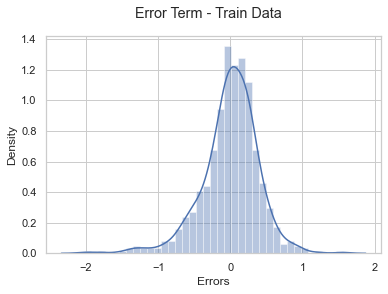

In [66]:
fig = plt.figure()
sns.distplot(res)
fig.suptitle("Error Term - Train Data")
plt.xlabel('Errors')
plt.show()

**Assumption 2 in Linear Regression** - The error-term is normally distributed and centered around the 0 mean

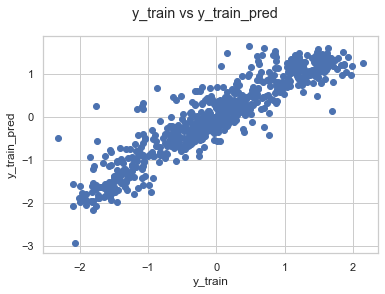

In [67]:
# Plotting y_train and y_train_pred
fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle("y_train vs y_train_pred")
plt.xlabel("y_train")
plt.ylabel("y_train_pred")
plt.show()

### 2. Prediction and Residuals on Test data

In [68]:
# Prediction on X_test and calculate residuals

X_test = X_test[X_train_ols.columns]
y_test_pred = model5.predict(X_test)

res_test = y_test.flatten() - y_test_pred

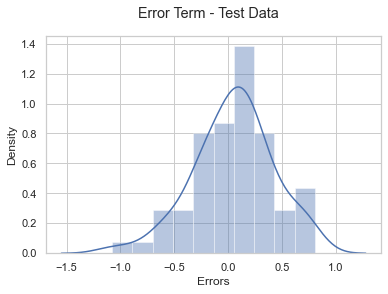

In [69]:
fig = plt.figure()
sns.distplot(res_test)
fig.suptitle("Error Term - Test Data")
plt.xlabel("Errors")
plt.show()

**Assumption 2 in Linear Regression** - The error-term is normally distributed and centered around the 0 mean

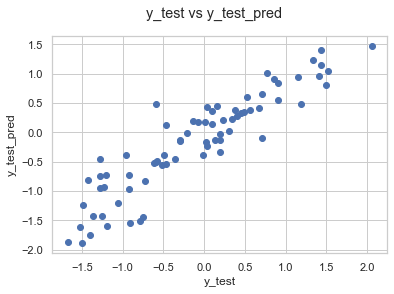

In [70]:
# Plotting y_test and y_test_pred
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle("y_test vs y_test_pred")
plt.xlabel("y_test")
plt.ylabel("y_test_pred")
plt.show()

# Accuracy

In [71]:
# Accuracy on train dataset
r2_score(y_train, y_train_pred)

0.8463032108098039

In [72]:
# Accuracy on test dataset
r2_score(y_test, y_test_pred)

0.8319782692185911

Looking at the above R2-score on Train and Test dataset, our model is perfoming well on the both the dataset. 

- There is no sign of overfitting as score on train and test dataset is in the acceptable range
- Adjusted r-score is also acceptable for the model